<a href="https://colab.research.google.com/github/gopaljigupta45/Gopal-Ji-Gupta-EDA-Hotel-Booking/blob/main/GOPAL_JI_GUPTA_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Mounting the drive to load our data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading the dataset and the libraries we'll need.**

---



In [2]:
# Importing the libraries and tools that we'll need.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing the relavent dataset.
file_path = "/content/drive/MyDrive/ALMABETTER DATA SCIENCE MATERIALS/Module 1 - Python/EDA Capstone Project - Hotel Booking Analysis/dat/Hotel Bookings.csv"
df = pd.read_csv(file_path)

In [4]:
# Checking how the dataframe looks.
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### **Explaining the problem statement and the data :**

---

We have a dataset which contains booking data for two hotels and has several intricate details about every individual instance of booking. 

These details include things like how many adults, children and babies were there for a booking, what meal categories the guests chose, which distribution channel they used to make the booking, if they made any modifications to the booking. Which market segment they belong to, the duration of their stay, the type of room they booked and much more.

We will perform Exploratory Data Analysis on this data and try to arrive at data-driven industrial insights.

First Let's understand the data which is in tabular form(rows and columns)

Each Row in our dataset contains information for a particular instance of booking. Now Let's explain what every column in our dataset contains.

 1.  hotel - Hotel Name 
 2.   is_canceled - If a booking was canceled or not. 
*   0 - Booking was not cancelled.
*   1 - Booking was cancelled.


 3.   lead_time - Waiting time(in days) between the time of booking and time of arrival.
 4.   arrival_date_year - Year of arrival.
 5.   arrival_date_month - Month of arrival.
 6.   arrival_date_week_number - Week number of arrival.          
 7.   arrival_date_day_of_month - Day number of arrival.        
 8.   stays_in_weekend_nights - No. of weekend nights that the customer stayed for.           
 9.   stays_in_week_nights - No. of week nights that the customer stayed for.              
 10.   adults - No. of adults staying.
 11.  children - No. of children staying. 
 12.  babies - No. of babies staying.
 13.  meal - Meal type chosen by the customer. 
*   SC - Self catering.(No meals included)
*   BB - Bed and Breakfast
*   HB - Half Board(Breakfast and Lunch/ Breakfast and Dinner)
*   FB - Full Board(Breakfast + Lunch + Dinner)


 14.  country - Country of origin of the customer.
 15.  market_segment - Market segment to which customer belongs.
 16.  distribution_channel - Distribution channel through which booking was made. 
 17.  is_repeated_guest - Whether or not a customer has stayed in the same hotel before. 
*   0 - Not a repeated guest
*   1 - A repeated guest(Has stayed in the same hotel before)

 18.  previous_cancellations - Previous cancellations made by the customer.         
 19.  previous_bookings_not_canceled - Previous bookings that haven't been canceled.
 20.  reserved_room_type - Type of the room reserved.  
 21.  assigned_room_type - Type of the room assigned.            
 22.  booking_changes - No. of booking changes made.
 23.  deposit_type - Type of deposit made.
 24.  agent - Unique ID of Agent through which booking is made.
 25.  company -  Unique ID of Company through which booking was made.
 26.  days_in_waiting_list - number of days spent on the waiting list by customer.
 27.  customer_type - Type of customer.
 28.  adr - Average daily rate.
 29.  required_car_parking_spaces - No. of car parking spaces required by the customer.     
 30.  total_of_special_requests - Total number of special requests made by the customers.        
 31.  reservation_status - Status of reservation.              
 32.  reservation_status_date - Date of change in reservation status.

---




In [5]:
# Getting the information about the entries in the dataframe - their dtypes and no. of null values, columns etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Let's create a copy of this dataframe so as to keep it preserved before we operate on it.
new_df = df.copy()

### **Data Preparation :**

---



In [7]:
# Let's see if there are any duplicate values in our dataframe.
df[df.duplicated()]
# So indeed, below are the duplicated rows.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [8]:
# Let's drop these duplicate values from our dataframe. Which will make it easier to operate on.
df.drop_duplicates(inplace=True)

In [9]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
# This shortens our dataset significantly.
# Now let's check if there are null values in our df.
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


So we see that just the two columns in our df account for most of the null values and only 4 columns have null values.
We need to be very careful when operating on these 4 columns.

In [11]:
# So we can now proceed by removing the two columns that account for the most number of null values.
# We can't simply drop these observations as it'll lead to a shorter dataframe as null values in these columns are in tens of thousands.
df=df.drop(columns=['agent','company'])

In [12]:
# Now let us deal with the null values in other columns.
# As now there are just two columns that have small number of null values in them, we can simply drop those observations.
df.dropna(inplace=True)

In [13]:
# Checking the new shape of our df.
df.shape

(86940, 30)

In [14]:
# Confirming if all the null values have been removed or not.
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Now as we can see all the null values have been dealt with.

Now we need to check if there are any outliers in our dataframe.

In [15]:
# Checking the stats of our df.
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000
mean,0.275903,80.193375,2016.211824,26.841477,15.818024,1.007396,2.628744,1.878525,0.139211,0.010835,0.039234,0.030228,0.176708,0.271854,0.753497,106.574804,0.083448,0.699459
std,0.446971,86.100147,0.686016,13.654505,8.834469,1.028763,2.043753,0.625860,0.456786,0.113592,0.194152,0.369574,1.717885,0.728090,10.041816,54.957439,0.280402,0.831840
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.400000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


Text(0.5, 1.0, 'Boxplot to detect outliers in our dataframe.')

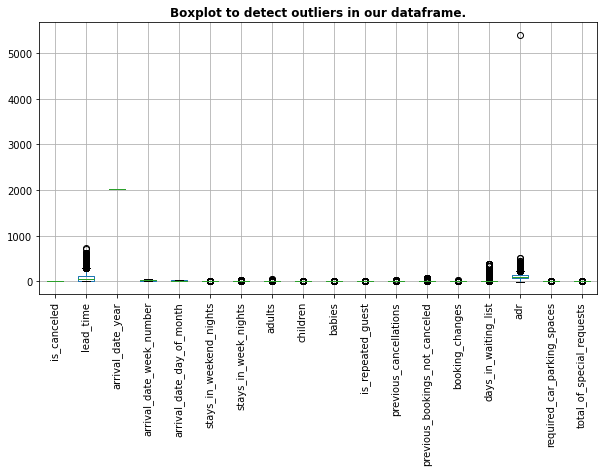

In [16]:
# We can use a boxplot to check for outliers in our df.
plt.figure(figsize=(10,5))
df.boxplot()
plt.xticks(rotation=90)       # We rotate the xticks to avoid overlapping due to lack of space.

# Setting the title.
plt.title('Boxplot to detect outliers in our dataframe.', weight='bold')

From this graph, its clear that there are outliers in the adr,  lead_time, and days_in_waiting_list columns.

Text(0.5, 1.0, 'Boxplot for adr column')

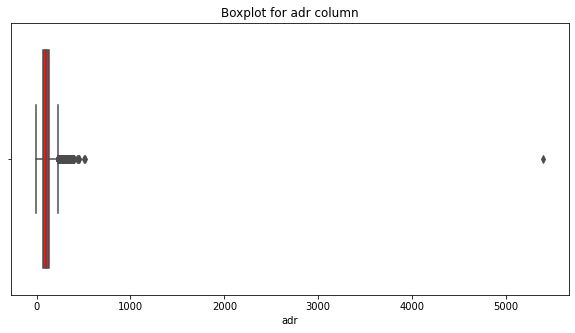

In [17]:
# Let's confirm this by visualizing these columns individually using boxplot on these.
# Plotting adr column.
plt.figure(figsize=(10,5))
sns.boxplot(x=df['adr'], color='red')
plt.title('Boxplot for adr column')

Text(0.5, 1.0, 'Boxplot for lead_time column')

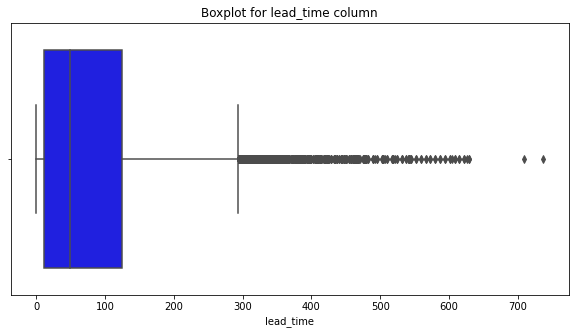

In [18]:
# Plotting for lead_time column.
plt.figure(figsize=(10,5))
sns.boxplot(x=df['lead_time'], color='blue')
plt.title('Boxplot for lead_time column')

Text(0.5, 1.0, 'Boxplot for days_in_waiting_list column')

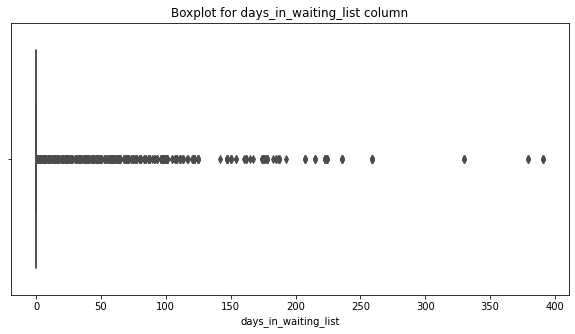

In [19]:
# Plotting the days_in_waiting_list column.
plt.figure(figsize=(10,5))
sns.boxplot(x=df['days_in_waiting_list'], color='blue')
plt.title('Boxplot for days_in_waiting_list column')

In [20]:
# Removing the outliers from these columns. We will use the Quantile method for this.
# As we can see that from the above boxplot for days_in_waiting_list, the Q1 and Q2 both have same value so we skip this column.
# As it clearly doesn't have outliers but just some high values.
relavent_columns = ['lead_time', 'adr']

# Getting the first and third quantile(top 25 and 75 percentile respectively).
Q1 = df[relavent_columns].quantile(0.25)
Q3 = df[relavent_columns].quantile(0.75)

# Getting the interquantile range(IQR).
IQR = Q3 - Q1

print(IQR)

lead_time    113.00
adr           61.85
dtype: float64


In [21]:
# Getting the observations where outliers are not present in our relavent columns. 
# And overwriting the df to only include these observations.
df = df[~((df[relavent_columns] < (Q1 - 1.5*IQR)) | (df[relavent_columns] > (Q3 + 1.5*IQR))).any(axis=1)]

# Checking the new shape.
df.shape

(82005, 30)

### **First objective: Let's find out what is the best time of the year to book a hotel room? And also find out which is the busiest month of the Hotel?**

---



To solve this, we will take a look at the monthly booking data for both hotels combined and specifically as well as the time gap between the time of booking and the time of arrival(Lead Time).
We need to look at the lead time as it will help us answer the question of best time of the year to make the booking.

In [22]:
# Getting the monthly booking data for each hotel as well as the combined stats.
# Using Groupby to get data for specific hotels. And using unstack function to get extensive details that we store in another dataframe.

# Also Creating a transpose so we get our information column-wise. It also makes it easier to plot and read.
monthly_hotelwise_df = df.groupby('hotel')['arrival_date_month'].value_counts().unstack().T

# Reseting the index of our new dataframe inplace.
monthly_hotelwise_df.reset_index(inplace=True)

# Let's see what this df looks like.
monthly_hotelwise_df.head()

hotel,arrival_date_month,City Hotel,Resort Hotel
0,April,4944,2772
1,August,6176,3321
2,December,2933,2020
3,February,3569,2427
4,January,2695,1906


We can see that in the above dataframe, months are not in proper chronological order(as they appear in the calender). So we need to do Sorting to get the months in order.   
We do this by creating a dict which initially has the months in chronological order as keys and zeros as values for every key.

Then we iterate over the dataframe and for every month, we take the corresponding values from the dataframe and add them to the 
Dict as values for their respective keys. So we get a dictionary which contains the same information as our dataframe with the months in chronological order as output.
Then we convert it to a dataframe using from_dict function.



In [23]:
# Creating a dict which initially has the months in chronological order as keys and zeros as values for every key.
# We do this by creating two lists - one for months and one which has zeros and then we zip them.
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
zero_list = [0 for i in range(0,len(month_list))]

# Now we zip them to form a dict.
month_dict = dict(zip(month_list,zero_list))

# Then we iterate over the dict keys and dataframe and for every month, we take the corresponding values from the dataframe and add them 
# to the dict as values for their respective keys.
for i in month_dict.keys():
  for index,row in monthly_hotelwise_df.iterrows():
    if i==row['arrival_date_month']:
      month_dict[row['arrival_date_month']] = (row['City Hotel'],row['Resort Hotel'])

# Setting the figsize of our chart accordingly using plt.rcParams function 
plt.rcParams['figure.figsize'] = (14,5)

# Now converting the dict to dataframe. Since we reset index earlier, we need to rename the columns with hotel names.
sorted_monthly_df = pd.DataFrame.from_dict(month_dict, orient='Index').rename(columns={0:'City Hotel',1:'Resort Hotel'})

# Checking this df now. The months should be in proper order.
sorted_monthly_df.head()

,City Hotel,Resort Hotel
January,2695,1906
February,3569,2427
March,4804,2572
April,4944,2772
May,5101,2787


Text(0.5, 1.0, 'Monthly Booking Data')

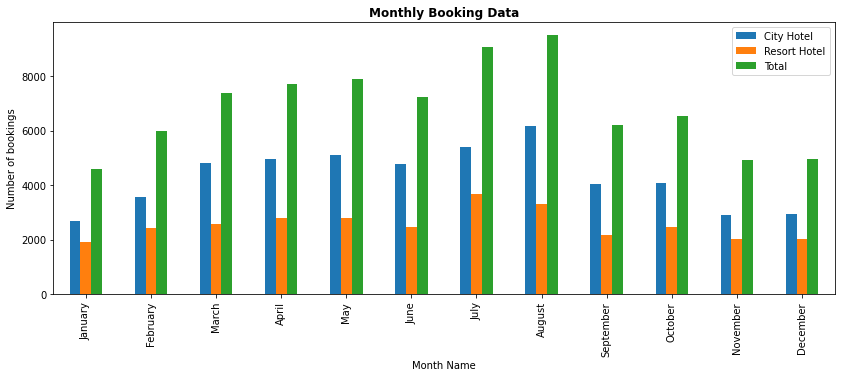

In [24]:
# Now we also want to see the total booking stats for both hotels as well.
# Adding a new column which has total no. of bookings for both hotels combined. We do this by simply adding the two columns.
sorted_monthly_df['Total'] = sorted_monthly_df['City Hotel'] + sorted_monthly_df['Resort Hotel']

# Now we plot this dataframe using a bar chart.
sorted_monthly_df.plot.bar()

# Now changing the title and x and y labels.
plt.xlabel('Month Name')
plt.ylabel('Number of bookings')
plt.title('Monthly Booking Data', weight='bold')

Text(0.5, 1.0, 'Monthly Lead Time Data for both Hotels')

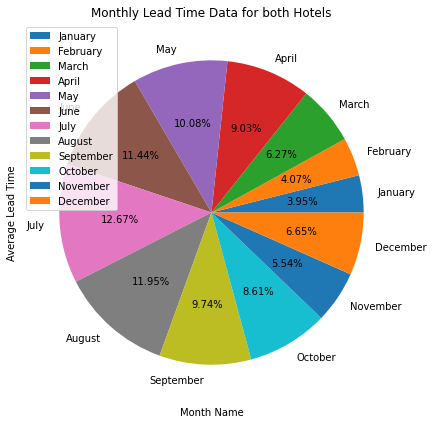

In [25]:
# Now looking at the average Lead time for each month. We will use groupby for this and find mean of lead_time.
monthly_lead_time_df = df.groupby('arrival_date_month')['lead_time'].mean().reset_index()

# Again we will need to do sorting by month using the same approach.
# creating another dict of month names and zeros.
lead_sample_dict = dict(zip(month_list,zero_list))     # We will use the same lists of month names and zeros to create our dict.

# Then we iterate over the dict keys and dataframe and for every month, we take the corresponding values from the dataframe and add them 
# to the dict as values for their respective keys.
for i in lead_sample_dict.keys():
  for index,row in monthly_lead_time_df.iterrows():
    if i in row['arrival_date_month']:
      lead_sample_dict[i]+=row['lead_time']

# So we get a dictionary which contains the same information as our dataframe with the months in chronological order as output.

# Setting the figsize 
plt.rcParams['figure.figsize'] = (7,7)

# Now we convert our dict to a dataframe using from_dict function and plot it. Also we rename the column as it has zero as it's label.
sorted_lead_time_df = pd.DataFrame.from_dict(lead_sample_dict, orient='index').rename(columns={0:'Lead Time Data for both hotels combined'})

# Now we plot this df using a pie chart.And we use autopct argument to get the percantage share of each variable.
sorted_lead_time_df.plot.pie(subplots=True,autopct='%1.2f%%')

# Also changing the title name and x and y labels to make the graph more understandable.
plt.xlabel('Month Name')
plt.ylabel('Average Lead Time')
plt.title('Monthly Lead Time Data for both Hotels')

### **Conclusions Drawn:**

From the graphs displayed above, we can answer with certainity that ***August is the busiest month*** for the hotels. This is evident when we look at monthly bookings graph. Both the hotels have highest number of bookings in August and the overall bookings also are highest in the Month of August. 

Now to determine when is the best time to book a hotel, we need to factor in a few things. The best time to make a booking would really depend on the purpose behind it. For example if the reason behind your booking is to visit Manali, you'd like to go there in snow season. But if you want to visit the Taj Mahal, you can do that anytime and it won't make a difference.So the purpose behind the booking matters.

So as we mentioned, August is the busiest time of the year. Everyone is trying to make a booking in August despite a big lead time (Time gap between the time of booking and arrival). This, may be because of the wonderful Autumn weather which would also explain the increase in booking numbers during spring season i.e. from March to May as compared to before and after spring season. 

***On the basis of this assumption, August is the best time to book a hotel.***

However that also means that availability of the rooms would be an issue. And as we can see in the lead time chart, lead time is also highest for the months of July and August. ***So if we look at things from the point of view of availability of rooms and comfort in terms of avoiding large crowds, best time to make the booking will be in the month of January.*** As it has the least number of bookings and lead time is also the lowest.

### **Second Objective: Find out the optimal length of stay to get the best daily rate.**

---



To solve this, we will take a look at the average daily rates and compare it proportionately to the number of days of stay and we will also need to look at the factors affecting this like the meal category chosen.

In [26]:
# Extracting the average daily rate and stays_in_weekend_nights and stays_in_week_nights columns.
daily_rate_df = df[['adr','stays_in_weekend_nights','stays_in_week_nights', 'meal']].copy()

# we have used copy here so that we can freely operate on this new dataframe such as adding a column, which wouldn't work on a sliced df.
daily_rate_df.tail()

,adr,stays_in_weekend_nights,stays_in_week_nights,meal
119385,96.14,2,5,BB
119386,225.43,2,5,BB
119387,157.71,2,5,BB
119388,104.40,2,5,BB
119389,151.20,2,7,HB


In [27]:
# Now, we want stats for entire stay - weedends and week nights. So we create a new column for total stay duration. This we 
# can obtain by adding the weekend nights and week nights columns.
daily_rate_df['total_stay_duration'] = daily_rate_df['stays_in_weekend_nights'] + daily_rate_df['stays_in_week_nights']

# Finding out what is the minimum value of average daily rate. We have to look past the cases where adr is zero. Because, that is a 
# case of cancellation. So we will consider only the greater than zero values and find the minimum of that.
daily_rate_min_adr_df = daily_rate_df.groupby('total_stay_duration')['adr', 'meal'].min().reset_index()
daily_rate_min_adr_df=daily_rate_min_adr_df[daily_rate_min_adr_df['adr']>0]
daily_rate_min_adr_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,total_stay_duration,adr,meal
16,16,33.31,BB
17,17,11.53,BB
18,18,34.80,BB
19,19,26.26,BB
20,20,24.94,BB


<Figure size 432x432 with 0 Axes>

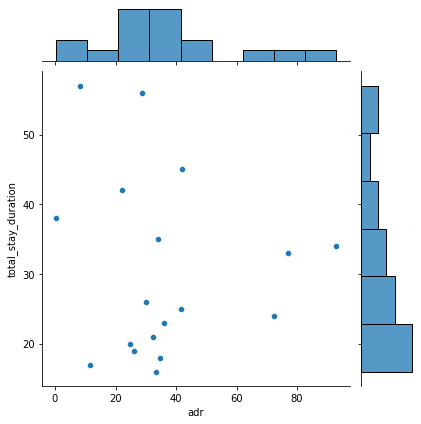

In [28]:
# Showing the relation between total stay duration and average daily rate.
plt.figure(figsize=(6,6))
sns.jointplot(x='adr', y='total_stay_duration', data=daily_rate_min_adr_df, kind='scatter' )

Above graph shows the relation between total stay duration and Positive values of average daily rate.

In [29]:
# Finding the minimum non-negative value of adr column(as adr can't be negative).
daily_rate_df[daily_rate_df['adr']>0].min()

adr                        0.26
stays_in_weekend_nights       0
stays_in_week_nights          0
meal                         BB
total_stay_duration           1
dtype: object

In [30]:
# Now we take a look at the total stay duration for the instance where adr is minimum (holds the value 0.26).
daily_rate_df[daily_rate_df['adr']==0.26]

,adr,stays_in_weekend_nights,stays_in_week_nights,meal,total_stay_duration
35059,0.26,12,26,SC,38


This is the length of optimal stay to get the lowest average daily rate for the SC (self-catering meal category).


In [31]:
# Now Let's check for other meal categories as well. Let's check for BB - Bed and Breakfast.
daily_rate_df[(daily_rate_df['adr']>0) & (daily_rate_df['meal']=='BB')].sort_values('adr').head(2)

,adr,stays_in_weekend_nights,stays_in_week_nights,meal,total_stay_duration
47427,0.5,4,8,BB,12
47642,1.0,2,1,BB,3


In [32]:
# Now let's check for HB - Half Board (Includes breakfast and lunch or breakfast and dinner)
daily_rate_df[(daily_rate_df['adr']>0) & (daily_rate_df['meal']=='HB')].sort_values('adr').head(2)

,adr,stays_in_weekend_nights,stays_in_week_nights,meal,total_stay_duration
82668,1.0,2,1,HB,3
85120,1.0,0,2,HB,2


In [33]:
# Now let's check for FB - Full Board (Includes breakfast, lunch and dinner)
daily_rate_df[(daily_rate_df['adr']>0) & (daily_rate_df['meal']=='FB')].sort_values('adr').head(2)

,adr,stays_in_weekend_nights,stays_in_week_nights,meal,total_stay_duration
5232,19.0,1,2,FB,3
16570,19.0,1,2,FB,3


### **Conclusions Drawn:**

As we see, ***the optimal length of stay in order to get the minimum average daily rate is 38***. Which is explained by the fact that those staying longer will in general have to pay less. However there are a lot of factors surrounding this - The meal category selected here is SC - self catering which means no cost is included for any meals. 

The meal category has a big impact on the daily rate that is offered. FB - Full Board category will have a higher average daily rate than HB(half board), BB (Bed and Breakfast) and SC(self-catering). So there are a lot of factors to deal with. Also the price will vary according to what time of year it is and how much demand is there and so on and so forth.

The optimal length of stay will be different for different meal categories as is demonstrated in last few code cells.

### **Third Objective: Find out which market segment makes the highest number of Bookings?**

---
To solve this, we will need to look at the market segment data for every booking made.


Text(0.5, 1.0, 'Bookings by Market Segment')

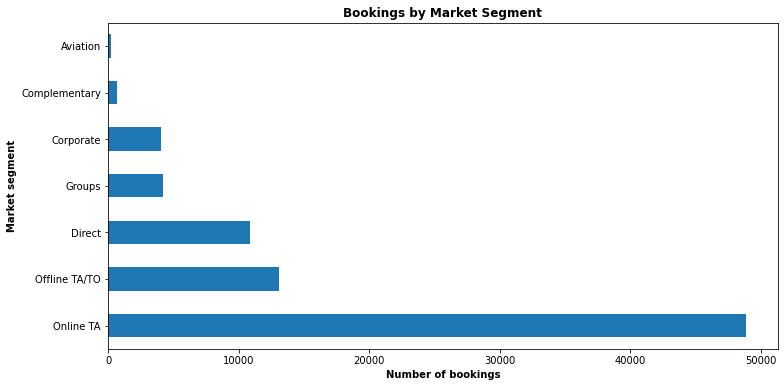

In [34]:
# Setting the figsize.
plt.rcParams['figure.figsize'] = (12,6)
# Extracting the information for market_segment column using the value_counts method and plotting it using a horizontal bar chart.
market_segment_df = df['market_segment'].value_counts().plot.barh()

# setting the labels and title.
plt.xlabel('Number of bookings', weight='bold')
plt.ylabel('Market segment', weight='bold')
plt.title('Bookings by Market Segment', weight='bold')

### **Conclusions Drawn:** 

Clearly, as we can see in the above chart, ***Online Travel agencies are the market segment that have made the most number of bookings*** followed by offline Travel agencies. 

This can be explained by the fact that most people actually go through a travel agency and select their offered services and packages when going on a tour. 

This is the case mainly because the travel agencies offer a pre-planned itinerary so you don't have to research and decide which landmarks to visit and plan everything from managing your time accordingly to making travel and other arrangements. They are the ones to arrange for everything which gives their users freedom from worrying about anything so the end user can simply enjoy the experience.


### **Fourth Objective: Let's find out that when a customer is accompanied by children or babies, how likely is the hotel going to receive a special request?**

---
For this objective, we will need to look at the observations where customers were travelling with a child or a baby and look at the special requests made in those instances.






Text(0.5, 1.0, 'Frequency of No. of special requests made by customers travelling with a child or a baby')

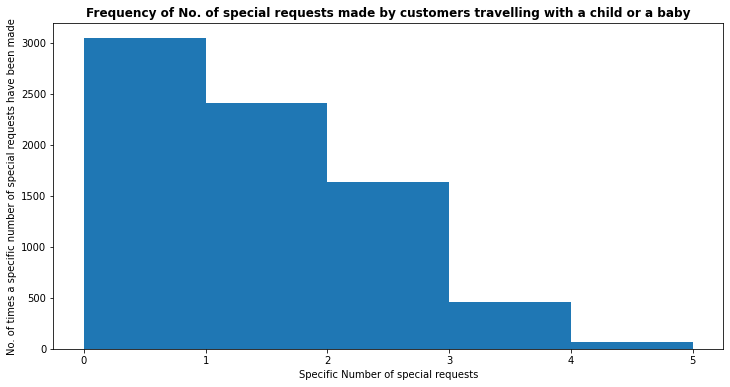

In [35]:
# Extracting the observations for which the children or the babies column have values more than zero.
special_requests_df = df[(df['children']>0) | (df['babies']>0)]

# Now plotting these observations using a histogram. This gives us the frequency of the number of requests made as output.
# Storing the data we want to plot in a variable.
y = special_requests_df['total_of_special_requests']

# Plotting the data using a histogram. We can use the bins argument to set values that we want to plot on x-axis which in this case 
# are unique number of special requests. We get these values by converting our column to a list and then passing it to a set.
bins = list(set(y.to_list()))

# Creating the histogram.
fig, ax = plt.subplots(figsize =(12, 6))
ax.hist(y,bins=bins, histtype='bar') 

# Setting the labels and title.
plt.xlabel('Specific Number of special requests')
plt.ylabel('No. of times a specific number of special requests have been made')
plt.title('Frequency of No. of special requests made by customers travelling with a child or a baby', weight='bold')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency of No. of special requests made by customers travelling with a child or a baby')

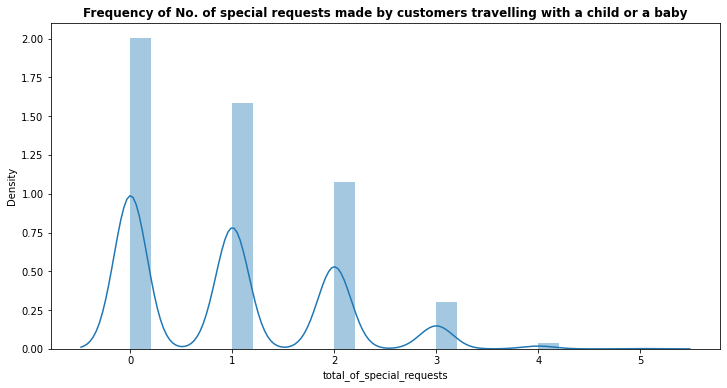

In [36]:
# Plotting these values using a distplot as well.
sns.distplot(y)

# Setting the title.
plt.title('Frequency of No. of special requests made by customers travelling with a child or a baby', weight='bold')

The above graph demonstrates the sheer number of times a certain number of special requests have been made by customers travelling with children or babies.

Text(0.5, 1.0, 'Number of zero and non-zero special requests for customers travelling with children or babies')

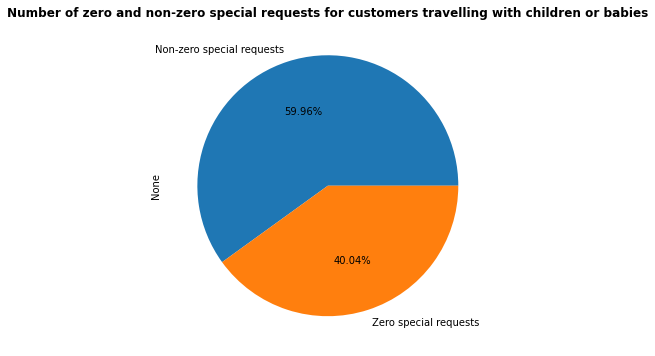

In [37]:
# Of the customers travelling with children or babies, what are the number of total observations that have made at least one special requests.
m = special_requests_df[special_requests_df['total_of_special_requests']!=0]['total_of_special_requests'].count()

# Of the customers travelling with children or babies, what are the number of total observations that have made at least zero special requests.
n = special_requests_df[special_requests_df['total_of_special_requests']==0]['total_of_special_requests'].count()

# Now let's plot these two numbers to see the difference. We do this by creating a series in which we pass the list of above two variables
# and then we plot it using a pie chart. And we use autopct argument to get the percantage share of each variable. 
pd.Series([m,n]).T.rename(index={0:"Non-zero special requests", 1:"Zero special requests"}).plot.pie(autopct='%1.2f%%')

# Setting the title.
plt.title('Number of zero and non-zero special requests for customers travelling with children or babies', weight='bold')

### **Conclusions Drawn :** 

By the charts drawn above, it is clear that when dealing with customers travelling with children or babies, although there are several instances where a special request has not been made, customers travelling with children or babies tend to make special requests more often than not with many such customers often making two,three and even upto 5 special requests in a few cases as can be seen from the histogram.

In-fact ***there is a 59.96 percent probability of a hotel receiving at least one special request*** when dealing with such customers. This is clearly demonstrated in the above pie chart.


### **Fifth Objective: Find out if the deposit type affects cancellations?**

---



To solve this question, we will take a look at deposit type and cancellation data and try to figure out if they are related to each other.

In [38]:
# Retrieving the relavent data from the dataframe.
deposit_cancel_df = df[['is_canceled','deposit_type']]

# Now, what we will do is use groupby on deposit_type column and get the count of values in cancellations. 
deposit_cancel_df.groupby('deposit_type')['is_canceled'].value_counts()

deposit_type  is_canceled
No Deposit    0              59969
              1              21186
Non Refund    1                701
              0                 54
Refundable    0                 74
              1                 21
Name: is_canceled, dtype: int64

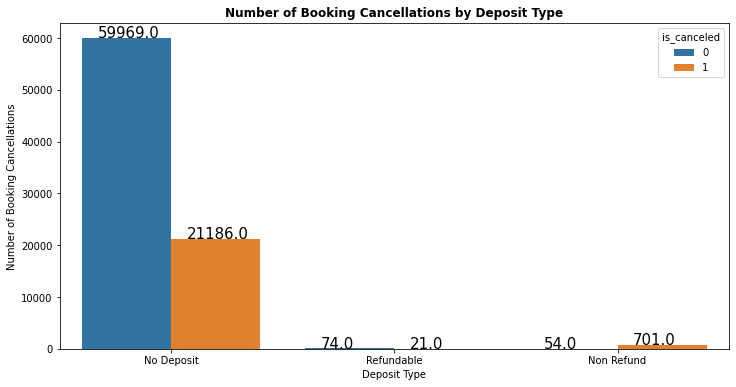

In [39]:
# Now we plot it using countplot function in seaborn library.
plt.figure(figsize=(12,6))
ex = sns.countplot(x='deposit_type',hue='is_canceled',data=df)

# Setting the labels and title.
plt.xlabel('Deposit Type')
plt.ylabel('Number of Booking Cancellations')
plt.title('Number of Booking Cancellations by Deposit Type', weight='bold')

# Now we annotate the values using the same approach as we used earlier in bar chart.
# Iterating over the graphs and passing the co-ordinates where annotation will be done.
for p in ex.patches:
        ex.annotate(format(p.get_height(), '0.1f'), (p.get_x()+0.07, p.get_height()+50), size=15)

In the above graph, blue graphs mark the observations that haven't been canceled and yellow bars show the observations which ended in cancellations.

### **Conclusions Drawn:**

We can clearly see from the graph above, that ***cancellations are highest in instances where no deposits have been made and the cancellation numbers show a significantly massive drop for those instances where a deposit was made even if that deposit were refundable.***

This is explained by the fact that once we put our money into a decision, we have a much higher tendency to stay committed to that decision and see it through.


### **Sixth objective: Find out how often repeated guests cancel their booking as compared to others?**

---



To solve this we will look at the cancellation and repetition data.

In [40]:
# Retrieving the relavant data.
repeated_guest_cancellation_df = df[['is_canceled','is_repeated_guest']]

# Now we use groupby to get the value counts of cancellations. So this way, we get cancellations for both those who were repeated guests 
# and those who weren't.
repeated_guest_cancellation_df.groupby('is_repeated_guest')['is_canceled'].value_counts()

is_repeated_guest  is_canceled
0                  0              56993
                   1              21659
1                  0               3104
                   1                249
Name: is_canceled, dtype: int64

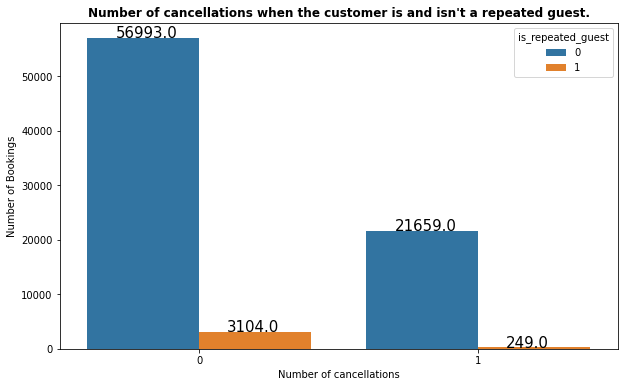

In [41]:
# Now we plot this data using the countplot function in seaborn library.
plt.figure(figsize=(10,6))
sample = sns.countplot(x= 'is_canceled',hue = 'is_repeated_guest',data = df)

# Adding the title and labels.
plt.title("Number of cancellations when the customer is and isn't a repeated guest.", weight='bold')
plt.ylabel("Number of Bookings")
plt.xlabel("Number of cancellations")

# Now we annotate the values using the same approach as we have used earlier.
# Iterating over the graphs and passing the co-ordinates where annotation will be done.
for p in sample.patches:
        sample.annotate(format(p.get_height(), '0.1f'), (p.get_x() + 0.1, p.get_height()+50),size=15)

Here, the 0 on the x-axis refers to instances where no cancellation was made and 1 refers to the instances where cancellations were made.

And similarly for the repeated guest data, 0 (depicted in blue bars) refers to those instances where no repetition was there and 1 (depicted in yellow bars) refers to those instances where the customer was a repeated guest.

### **Conclusions Drawn:**

We can clearly see from the graph above that ***the number of cancellations are far less for repeated guests(depicted by yellow color graphs) as compared with what they are for other guests.***

This is obviously because once you have stayed somewhere, the factor of uncertainity goes down. You know about everything - the facilities, the service etc. and then if you book into that same hotel again, that means you had a positive experience the first time around.

Now, such a customer will have far less reasons to cancel.

### **Seventh Objective: Find out total number of bookings by Customer type?**

---



To solve this, we will look at the customer type data.

In [42]:
# Retrieving the customer_type column and using value_counts method on it to get number of values for each customer type.
customer_type_data = df['customer_type'].value_counts()
# customer_type_data

Text(0.5, 1.0, 'Total number of bookings by Customer type')

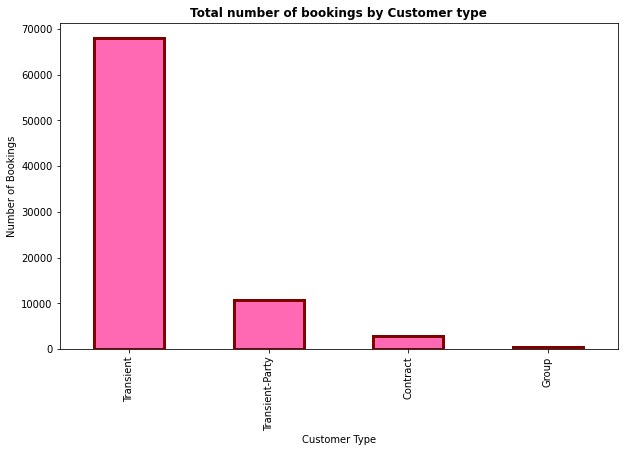

In [43]:
# Now we plot it using a bar chart.
plt.figure(figsize=(10,6))
customer_type_data.plot(kind='bar', color='hotpink', edgecolor='maroon', lw=3)

# Setting the labels and title.
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.title('Total number of bookings by Customer type', weight='bold')

### **Conclusions Drawn:**

From the graph above, we can ascertain that the majority of our customers are Transient. Transient travellers are folks who are predominantly on the move and seek short and often urgent hotel stays - meaning they are short term occupants and don't stay for a long period of time. This includes people who travel a lot for work like - crews for flights and ships, others who are visiting for short while because of temporary engagements like - attending webinars, sport games, interviews, etc.

 The fact that most of the customers qualify as Transient guests is explained by the fact that most people, if they want to stay for long period, would find other accommodations that are more cost effective and are more suited to the needs of long term stay.

### **Eighth Objective: Find out which market segment has made the most and least number of cancellations? Find out from which market segment is a customer most likely to cancel the booking? Does the booking cancellation affect repetition of customers?** 

---



To solve this question, we will take a look at the cancellations, market segments and repeated guests data.

Text(0.5, 1.0, 'Number of Cancellations by Market Segment')

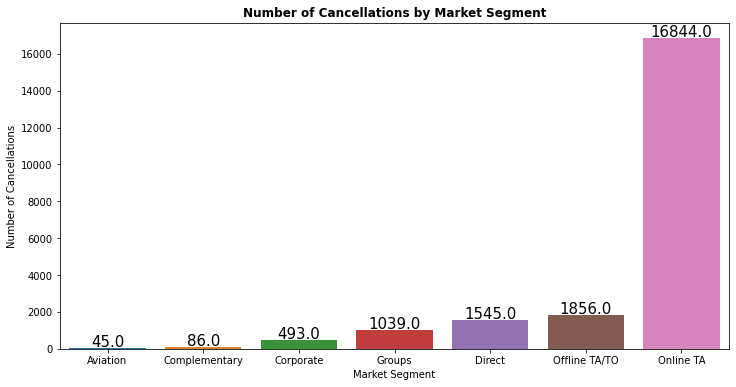

In [44]:
# Retrieving the relavant columns.
cancellation_df = df[['market_segment','is_canceled','is_repeated_guest']]

# Using Groupby on market_segment column to see data for specific market segments. And calling the sum function on the is_canceled column
# will give us the number of cancellations for each market segment.
data = cancellation_df.groupby('market_segment')['is_canceled'].sum().sort_values(ascending=True).reset_index()

# Using the seaborn library, and the barplot function, we plot the above data.
plt.figure(figsize=(12,6))
plots = sns.barplot(x="market_segment", y="is_canceled", data=data)

# Now we can iterate over each bar to annotate the values held by different variables in our chart.
# Using Matplotlib's annotate function and passing the coordinates where the annotation will be done

# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 6)
# ha and va stand for the horizontal and vertical alignment which we will set to center and size is the font.
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.1f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',
                 size=15, xytext=(0, 6),textcoords='offset points')
  
# Now setting the labels and the title.
plt.xlabel('Market Segment')
plt.ylabel('Number of Cancellations')
plt.title('Number of Cancellations by Market Segment', weight='bold')

Text(0.5, 1.0, 'Number of Repetitions of customers who canceled a booking')

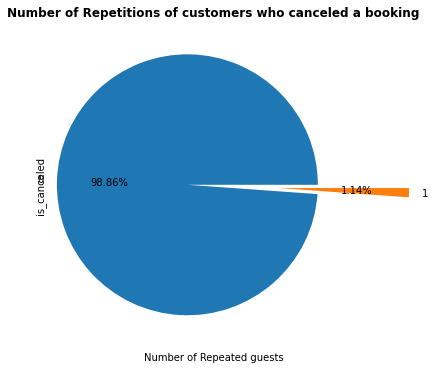

In [45]:
# Getting those observations for which there was a cancellation(using a condition that is_canceled column has value greater than zero).
# Now using groupby on this new df to find out in how many of these instances, there was a repetition.
new_cancellation_df = cancellation_df[cancellation_df['is_canceled']>0].groupby('is_repeated_guest').count()

# Now we plot this
new_cancellation_df['is_canceled'].plot.pie(subplots=True,autopct='%1.2f%%', explode=(0.2,0.5))  

# Setting the labels.
plt.xlabel('Number of Repeated guests')
plt.title('Number of Repetitions of customers who canceled a booking', weight='bold')

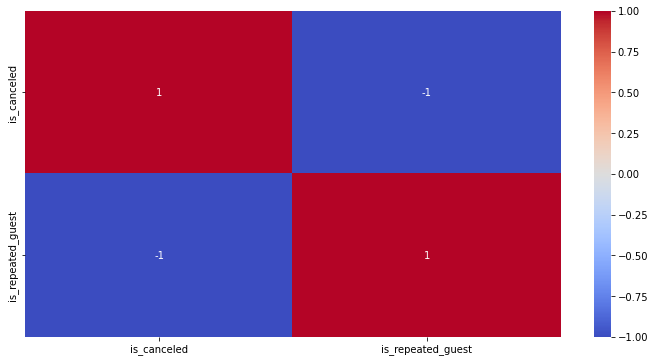

In [46]:
# Denoting the correlation between repetitions and cancellations using a heatmap.
sns.heatmap(new_cancellation_df.reset_index()[['is_canceled','is_repeated_guest']].corr(), vmin=-1, cmap='coolwarm', annot=True)

We can clearly say that cancellations and repetitions are negatively correlated.

### **Conclusions Drawn:**

Clearly we can see from the first graph(bar plot) above that ***the market segment which has made the least number of cancellations is Aviation*** with just 45 cancellations.  
The primary reason for this is that despite all our perceived troubles regarding Air travel, travelling by air is still a very reliable mode of transport in that it gets you to your destination on time. And even if your flight faces a delay, in most cases, as long as the delay is not atrociously long, it doesn't lead to cancellation of hotel bookings especially for the pilots and crew as they are even more eager to rest after a stressful day's work.

So only if the flight itself is cancelled, or is delayed/rescheduled by a very long period, then only the hotel rooms booked are cancelled.

***Online Travel agencies are the market segment responsible for the most number of cancellations and are thus most likely to cancel a booking***. This can be explained by the fact that for tour operators/ travel agencies offer their services(travel packages) to a large number of clients and these services are available over a long period of time - either on their website or other means, which means there are usually a lot of changes that can happen for example more people can book the package, some people can cancel, the entire visit can be rescheduled etc. Due to these and some other factors, these agencies/operators cancel their bookings far more than other market-segments. We can clearly see this in the market segment - cancellation graph.

Now from the second graph(pie chart) above, we can see that ***of those bookings which ended in a cancellation, only a litte more than one percent(1.14%) of the guests were repeated guests***(booked a room in the same hotel again). Also, we can see from the heatmap that ***cancellations and repetitions are negatively correlated*** or inversely proportional in mathematical terms. Meaning if repetitions are high, cancellations will be low and vice versa.

So clearly, cancellations do have a severe impact on the repetition of customers.

### **Ninth Objective: Find out which market segment has least number of days on the waiting list? Also analyze the days on waiting list for various distribution channels.**

---
To solve this, we will need to look at the market segment, distribution channel and waiting list data.


In [47]:
# Now let's see which market segment has the least number of days on the waiting list.
# For this, we will use groupby on market segment column and get the mean of the days in waiting list which is the average waiting time.
market_segment_waiting_list_df=df.groupby('market_segment')['days_in_waiting_list'].mean().reset_index()
market_segment_waiting_list_df

,market_segment,days_in_waiting_list
0,Aviation,0.000000
1,Complementary,0.005755
2,Corporate,0.134146
3,Direct,0.046907
4,Groups,5.567324
5,Offline TA/TO,1.875334
6,Online TA,0.002641


Text(0.5, 1.0, 'Days on waiting list by Market Segment')

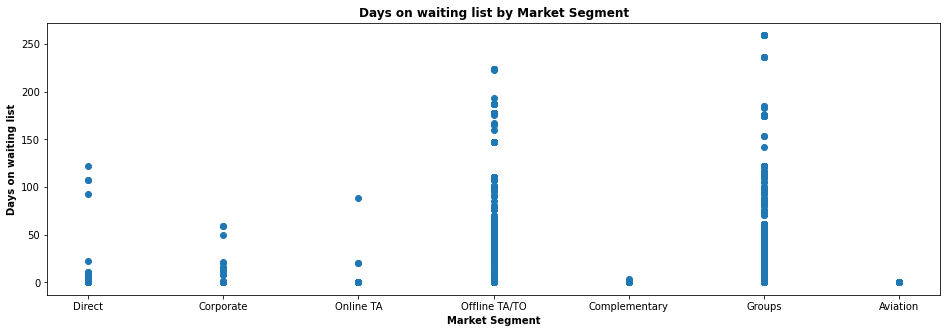

In [48]:
# Plotting the values using scatterplot.
plt.figure(figsize=(16,5))
plt.scatter(df['market_segment'], df['days_in_waiting_list'])

# Setting the title and labels.
plt.xlabel('Market Segment', weight='bold')
plt.ylabel('Days on waiting list', weight='bold')
plt.title('Days on waiting list by Market Segment', weight='bold')

The above graph shows us which market segment has had how many days on the waiting list.

In [49]:
# Now let's analyze number of days on waiting list for various distribution channels using same approach as above.
distribution_channel_market_segment_df = df.groupby('distribution_channel')['days_in_waiting_list'].mean().reset_index()
distribution_channel_market_segment_df

,distribution_channel,days_in_waiting_list
0,Corporate,0.207828
1,Direct,0.081900
2,GDS,0.000000
3,TA/TO,0.725913
4,Undefined,0.000000


Text(0.5, 1.0, 'Days on waiting list by Distribution Channel')

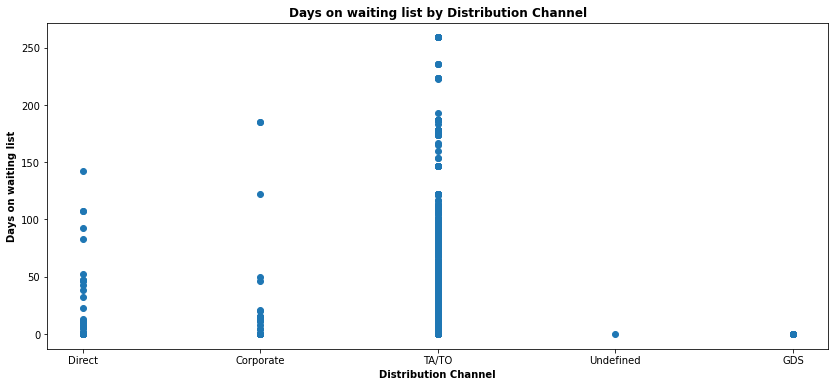

In [50]:
# Plotting distribution channel and waiting list data from the df using another scatter plot.
plt.figure(figsize=(14,6))
plt.scatter(df['distribution_channel'],df['days_in_waiting_list'])

# Setting the title and labels.
plt.xlabel('Distribution Channel', weight='bold')
plt.ylabel('Days on waiting list', weight='bold')
plt.title('Days on waiting list by Distribution Channel', weight='bold')

### **Conclusions Drawn:**

We can clearly see from the values and first scatterplot graph above that ***the market segment that has the least number of days on average is Aviation***. 

This is because Airlines have to arrange for accomodations for their pilots and crew members. And most of the flights are routinely scheduled which means a lot of back and forth travel between destinations for the crew members. Airline crews travel for work and so, they can't afford to wait to get a hotel room. And so they don't prefer hotels that put them on a waiting list.
Therefore, Hotels go to extraordinary lengths to provide preferential treatment for customers of the Aviation segment like making special arrangements for providing rooms with minimum waiting time possible.  

Now as we can see from the above graph that ***the distribution channel that has the most number of days on the waiting list is the travel agency/tour operators.*** 

This can be explained by the fact that these agencies/operators cancel their bookings far more than other market-segments. We can clearly see this in the market segment - cancellation graph(in previous objective) that travel agencies/operators are responsible for most number of cancellations. So the hotels tend to prioritize others over them.

### **Tenth Objective: Find out what is the effect of booking changes/modifications on cancellations.**

---



To solve this, we will take a look at those observations where the customers have made a booking change and look at the cancellation data for those observations.

In [51]:
# Using groupby on booking changes and getting the sum of cancellations for every specific number of booking changes.
booking_changes_data = df.groupby('booking_changes')['is_canceled'].sum().reset_index()

# Seeing what the data looks like
booking_changes_data

,booking_changes,is_canceled
0,0,19740
1,1,1317
2,2,628
3,3,118
4,4,59
5,5,20
6,6,15
7,7,3
8,8,4
9,9,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


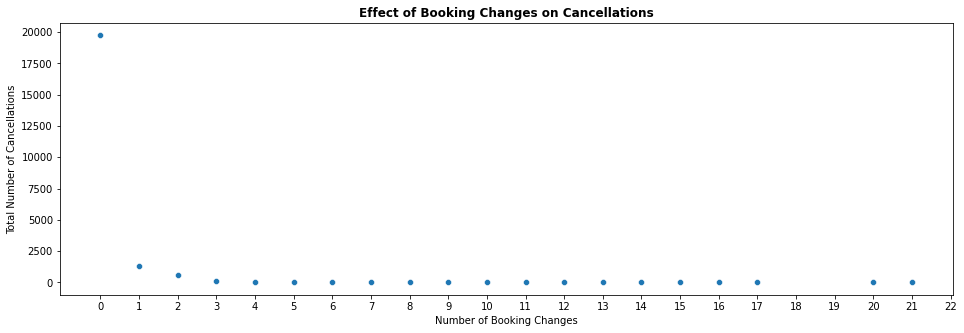

In [52]:
# Plotting the values using scatterplot.
plt.figure(figsize=(16,5))
sns.scatterplot(booking_changes_data['booking_changes'], booking_changes_data['is_canceled'])

# Setting the labels and title.
plt.title('Effect of Booking Changes on Cancellations', weight='bold')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Total Number of Cancellations')

# Setting the xticks (the frequency of values on x-axis) to make the graph easily readable.
xticks=[i for i in range(0,23)]
plt.xticks(xticks)
plt.show()

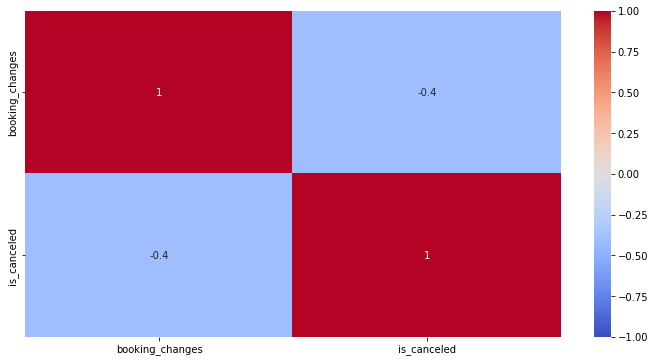

In [53]:
# Showing the correlation between cancellations and booking changes using heatmap.
sns.heatmap(booking_changes_data.corr(),vmin=-1,cmap='coolwarm', annot=True)

### **Conclusions Drawn:**

We can see from the above graphs and the values displayed in booking changes data, that as the number of booking changes goes up, the number of cancellations are down. This is also demonstrated by the heatmap above which shows a negative correlation(of -0.4) between the number of booking changes and number of cancellations.

This is explained by the fact that the customers make booking changes when they are dis-satisfied with their current accommodations and so as the number of changes they make goes up, their satisfatcion usually increases. And so those who have made several booking changes will be far more satisfied with their new accomodations. And so they tend to cancel in far lesser number of cases.

# **Analysing our dataset furthermore.**
---



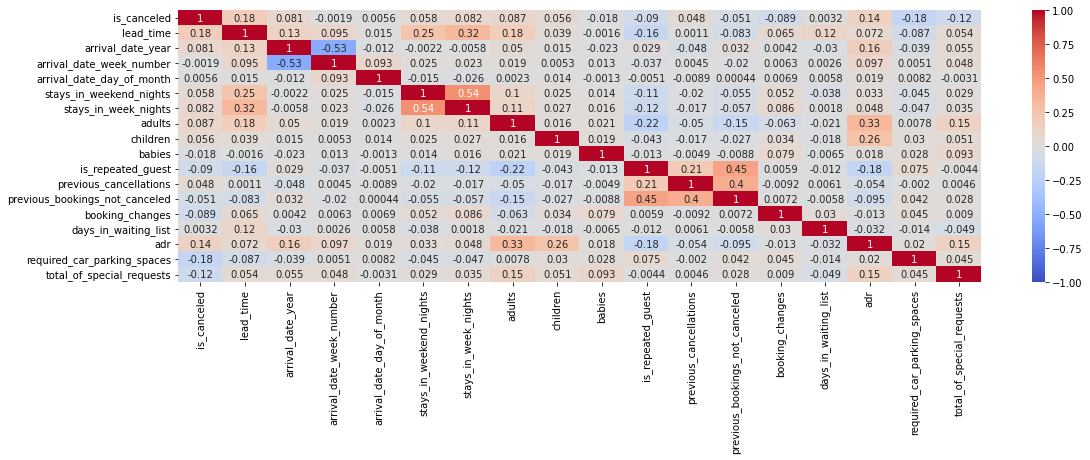

In [ ]:
# Representing the correlation amongst all the numerical columns using a heatmap.
heatmap_data = df.corr()

# Now we plot it.
plt.figure(figsize=(18,5))
sns.heatmap(heatmap_data, vmin=-1, cmap='coolwarm', annot=True)

Above Heatmap shows us the correlation between all the numerical columns present in our dataset.

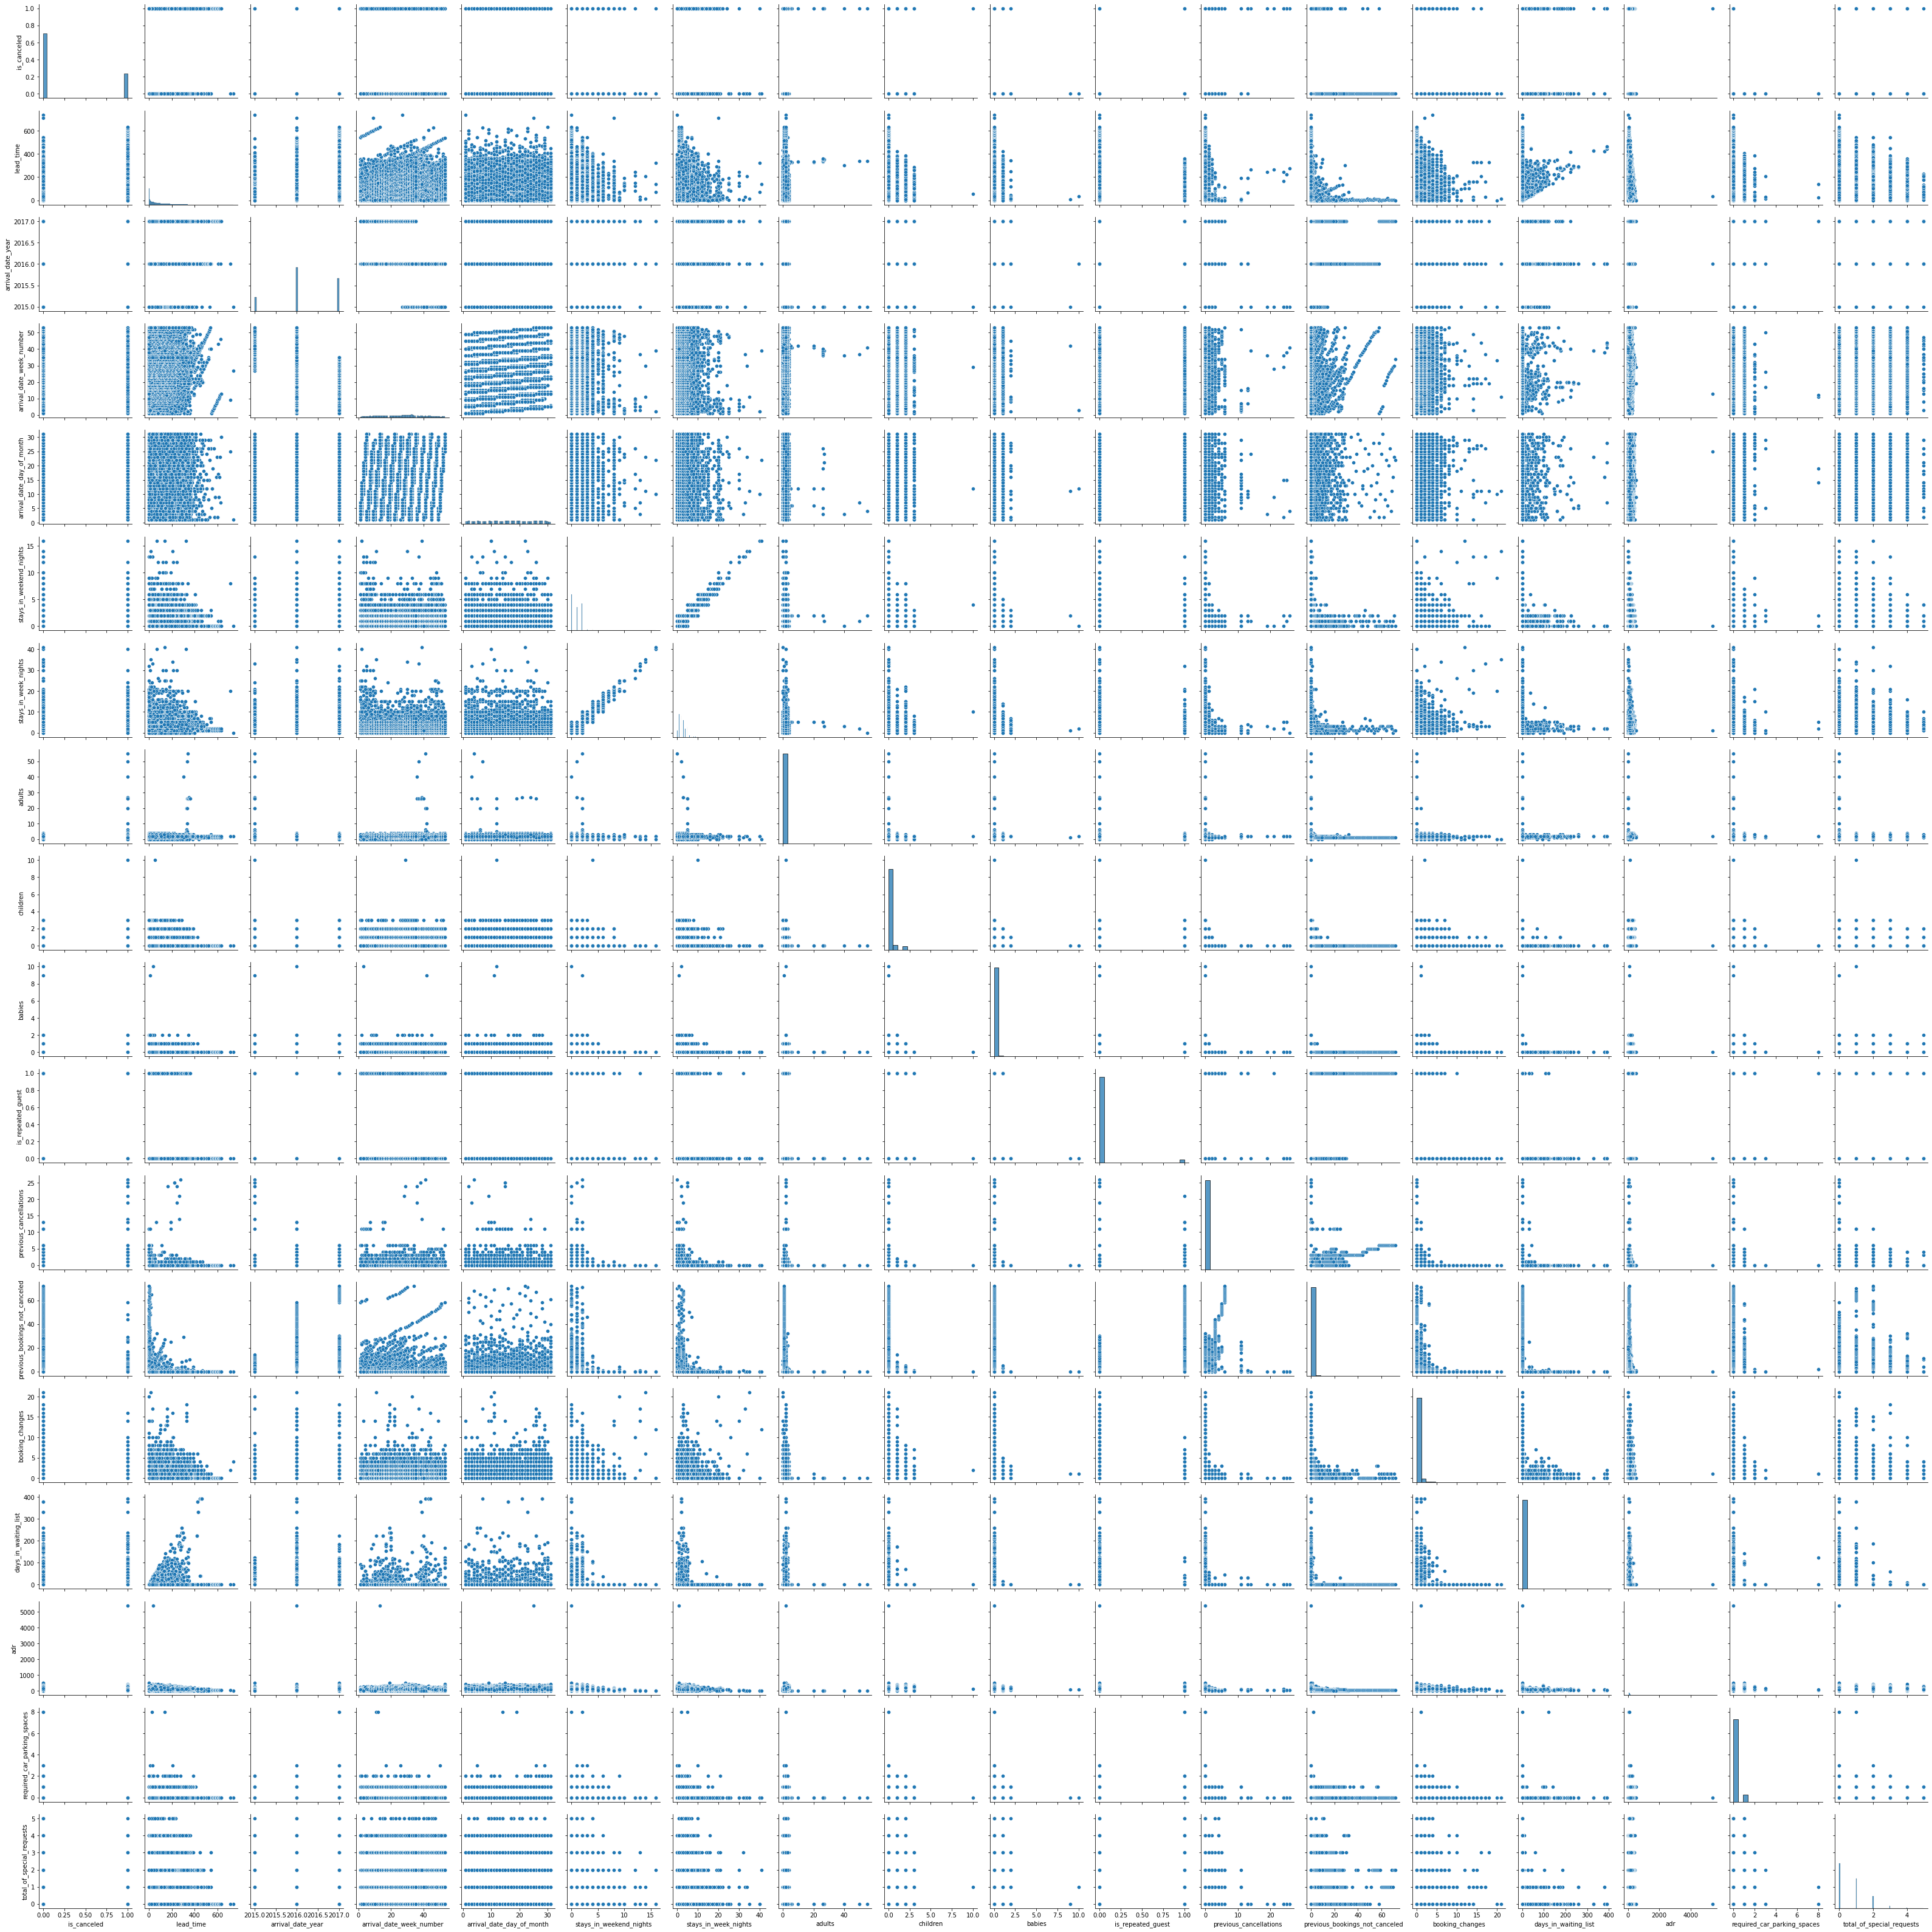

In [ ]:
# Plotting the entire dataframe using pairplot for some bi-variate analysis. 
# This will plot each column of our df with every other column.
sns.pairplot(df)

# **Insights Gained :**
*   From the data of bookings made for specific months throughout the year, we see that some months have much higher bookings than other with August being the busiest month. For these months, the hotels should take special care like hiring more staff to cater to the large number of guests. Also, during the winter months - where we see the number of bookings drop, efforts can be made to increase the numbers - For example: Striking an agreement with a travel agency to market their travel packages for those months by offering their customers a significant discount. 
*   When looking at the relationship between the deposit-type and cancellations, we find that the customers who have made a deposit, even if the deposit is refundable in nature, they tend to cancel less. So we should encourage customers to make a deposit. This can be done by offering a discount on pre-paid bookings as an example.
*   When looking at the customers travelling with a child or a baby, we found that while dealing with such customers, the number of total special requests made increases. Such customers tend to make one or more special requests more often than not. So in such cases, hotels can anticipate special requests and should make special effort to accomodate such customers.
*   We learned that the Aviation segment is the segment with the least number of cancellations and due to this and the unique requirements due to the nature of work in aviation industry, the aviation segment is least likely to be put on the waiting list when booking a hotel. 
*   We learned that the overwhelming majority of the customers are of Transient type - those who move around a lot - either because of their work or other reasons.
*   We learned that the distribution channel that accounts for the most number of cancellations is Travel agencies and so they have the most number of days on the waiting list.
*   We learned that those customers who have made some booking changes/modifications, are much less likely to cancel their booking.
*   We also found that those customers who are a repeated guest (have had a stay in the same hotel before), tend to cancel far less.


---





---

